<a href="https://colab.research.google.com/github/lianiindri/STUDIindependen/blob/main/indri_SL_Regresi_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebelum mulai silahkan:
*   Buat yang pake Colab --> Save a copy in drive dulu
*   Buat yang pake jupyter --> download dulu

In [ ]:
#Import all library needed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Pagi

# Uji Asumsi Klasik pada Regresi Linier
Regresi Linier memiliki 5 asumsi yang perlu dipenuhi. Asumsi ini sebenarnya wajib dalam teori ilmu statistika, namun dalam praktik machine learning proses ini terkadang diabaikan karena ketidaktahuan. Uji ini berfungsi untuk ketepatan estimasi dan menjauhkan dari bias

1. Hubungan (korelasi) linier antara feature dan label
2. Uji Normalitas
3. Tidak terjadi Heteroskedastisitas
4. Tidak terdapat autokorelasi
5. Tidak terdapat multikolinearitas (**untuk regresi berganda**)


Sumber buku "Multivariate data analysis" by Hair

In [ ]:
! wget -O 50_Startups.csv https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0

--2022-03-14 07:52:27--  https://www.dropbox.com/s/z2ue4a1ogefcuo3/50_Startups.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z2ue4a1ogefcuo3/50_Startups.csv [following]
--2022-03-14 07:52:28--  https://www.dropbox.com/s/raw/z2ue4a1ogefcuo3/50_Startups.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc90427faa0af98244218fd3b97a.dl.dropboxusercontent.com/cd/0/inline/BhYZ6lv4K_rwltSMUveRBu6gvGYe4sx_dc0O0151Ru6eF8nNTUjWabbzR-8Av7OJO_04nNRtL7vvivBkn7BJMEgP9lAAcsHIcO2ebAd-PU1KooXl8OJTp1WhXWqWCdUCq-Dr5ivWj06aLafBimAMJ2trqbKkN8qvRguANB9u7mdNHA/file# [following]
--2022-03-14 07:52:28--  https://uc90427faa0af98244218fd3b97a.dl.dropboxusercontent.com/cd/0/inline/BhYZ6lv4K_rwltSMUveRBu6gvGYe4sx_dc0O0151Ru6eF8nNTUjWab

In [ ]:
reglin = pd.read_csv('50_Startups.csv')
reglin.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
reglin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## 1. Hubungan Linier antara tiap feature dengan label (X dan Y)
Bisa menggunakan plot atau analisis korelasi

In [ ]:
reglin.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


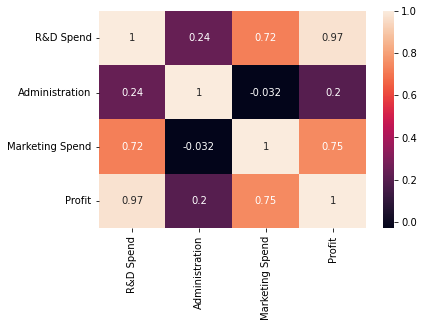

In [ ]:
#Atau Jika menggunakan heatmap
sns.heatmap(reglin.corr(), annot=True)

Dari analisis korelasi terlihat yang punya hubungan linier cukup kuat dengan profit adalah R&D Spend dan Marketing Spend. Mari lihat hasil scatter plotnya untuk lebih meyakinkan

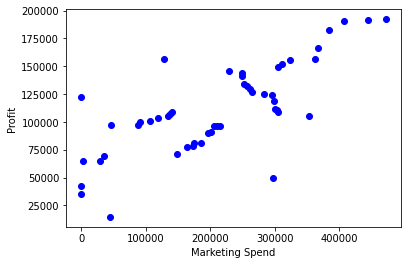

In [ ]:
plt.scatter(reglin['Marketing Spend'], reglin['Profit'], color='blue')
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

## Tugas 1 Coba lakukan scatter plot untuk Administration dan R&D spend

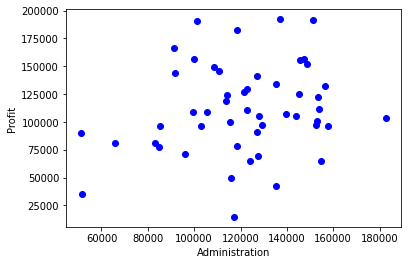

In [ ]:
#Administration
plt.scatter(reglin['Administration'], reglin['Profit'], color='blue')
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()


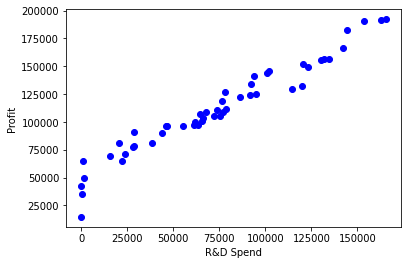

In [ ]:
#R&D Spend
plt.scatter(reglin['R&D Spend'], reglin['Profit'], color='blue')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()


Terlihat bahwa R&D dan marketing spend plotnya masih cenderung membentuk garis yang menunjukkan masing-masing memiliki hubungan yang kuat dengan profit, sementara administration plotnya terlihat berpencar sehingga tidak ada hubungan linier dengan profit. Jadi kedepannya variabel yang kita gunakan sebagai feature adalah R&D dan marketing spend.

## Tugas 2 : Lakukan Splitting Data Seperti Contoh ini

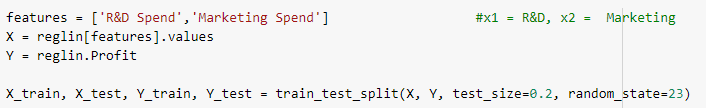

In [ ]:
#Type Your Code Here
features = ['R&D Spend','Marketing Spend']
x = reglin[features].values
y = reglin.Profit

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23 )


## 2. Uji normalitas
Disini yang kita uji adalah normalitas residual (errornya). Mengapa? karena menurut sifat distribusi normal, kalo errornya normal dan modelnya linier maka koefisien regresinya juga berdistribusi normal (terhindar dari bias outlier).

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

## Tugas 3 :    Uji Normalitas

Ketik kodingan ini

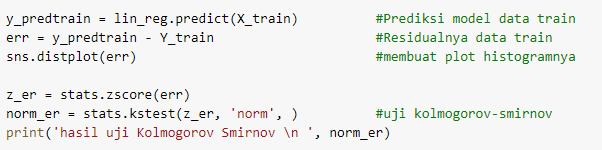

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji Kolmogorov Smirnov 
  KstestResult(statistic=0.12495970531173806, pvalue=0.528936822420008)


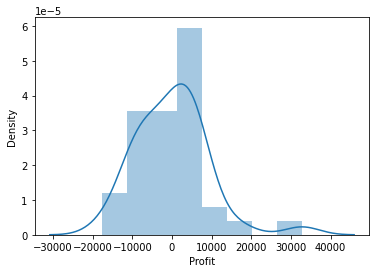

In [ ]:
y_predtrain = lin_reg.predict(x_train)         #Prediksi model data train
err = y_predtrain - y_train                   #Residualnya data train
sns.distplot(err)                              #membuat plot histogramnya

z_er = stats.zscore(err)
norm_er = stats. kstest(z_er, 'norm', )        #uji kolmogorov-smirnov
print('hasil uji Kolmogorov Smirnov \n ' , norm_er)


Ho : data = berdistribusi normal

Ha : data tidak berdistribusi normal

Karena pvaiue > 0.05, maka Ho diterima. Gambar histogram yang membentuk lonceng dan puncaknya cenderung ke tengah pun mendukung bahwa datanya sudah berdistribusi normal.

## 3. Tidak terjadi Heteroskedastisitas

Homoskedastisitas  adalah  kondisi ketika  nilai  residu/error  pada  tiap  nilai  prediksi  bervariasi  dan  variasinya  cenderung konstan. Lawan dari homoskedastisitas adalah heteroskedastisitas, dimana error cenderung berubah dan malah berkorelasi dengan prediksinya. Jika ini terjadi tentu menunjukkan bahwa prediksi ini memiliki suatu bias tertentu. Untuk mengeceknya kita bisa melihat plotnya

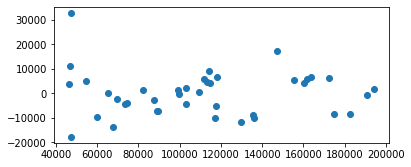

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

Terlihat plot errornya berada di sekitar angka yang sama meski nilai prediksinya bertambah, artinya nilai prediksi kita tidak terganggu oleh errornya

Berikut adalah contoh plot jika terjadi heteroskedastisitas, plotnya membentuk pola tertentu yang menunjukkan bahwa nilai prediksinya masih berkorelasi dengan error sehingga nilai prediksi kita masih terganggu oleh nilai errornya:

![alt text](https://drive.google.com/uc?id=1VX4X3w95lBlTphDXg9Ez2Rv9Ky3tUz8e)

Cara lain untuk menguji homoskedastisitas: using Glejser Test, White test, Breusch-Pagan test

## 4. Tidak terjadi multikolinearitas (regresi berganda)
Multokolinearitas maksudnya adalah hubungan yang kuat antar feature. Regresi linier mengasumsikan bahwa feature-featurenya tidak saling berhubungan. Tentu saja ini hanya berlaku untuk regresi linier berganda (yang featurenya lebih dari 1). Salah 1 cara mengujinya adalah nilai VIF.

In [ ]:
vif = [variance_inflation_factor(x_train, i) for i in range(len(x_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,R&D Spend,Marketing Spend
VIF,6.637335,6.637335


Some papers argue that a VIF<10 is acceptable, but others says that the limit value is 5.
- "10" as the maximum level of VIF (Hair et al., 1995)
- "5" as the maximum level of VIF (Ringle et al., 2015)


Jadi berdasarkab kriteria Hair tidak terjadi kolinearitas, tetapi kalo berdasarkan kriteria Ringle masih terjadi kolinearitas. Disini kita menggunakan teori Hair.

## 5. Tidak terjadi autokorelasi
Autokorelasi adalah hubungan yang erat antar entry, misalnya antara data ke 4 dengan ke 5, data ke-6 dengan ke-7, dll. Ini juga harus dihindari dalam regresi linier. Uji ini tersedia di library yang lain, sehingga kita perlu training model lagi menggunakan library itu.

In [ ]:
x_constant = sm.add_constant(x_train)                #Ingat lagi x1 = R&D, x2 =  Marketing
linreg = sm.OLS(y_train,x_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           5.97e-26
Time:                        06:10:23   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

![alt text](https://drive.google.com/uc?id=1iz2TAjhoquwj6nztVU9poi79-8-Bkda_)


Download DW table: https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf. Karena nilai dw = 2.147 berada diantara nilai du = 1.628 dan 4-du = 2.372, maka disini tidak ada masalah autokorelasi

# Mengevaluasi hasil regresi linier

## Tugas 4 :    evaluasi model

## MSE, RMSE, dan MAE

Berikut caranya :     

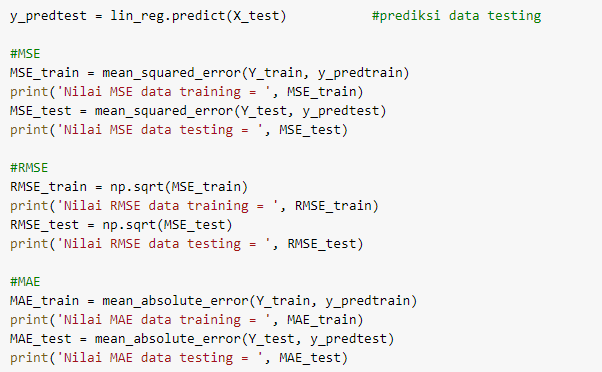

In [ ]:
#Type Your Code Here
y_predtest = lin_reg.predict(x_test)

#MSE
MSE_train = mean_squared_error(y_train,y_predtrain)
print('Nilai MSE data training =', MSE_train)
MSE_test = mean_squared_error(y_test, y_predtest)
print('Nilai MSE data testing =', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training =', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing =', RMSE_test)

#MAE
MAE_train = mean_absolute_error(y_train,y_predtrain)
print('Nilai MAE data training =', MAE_train)
MAE_test = mean_absolute_error(y_test, y_predtest)
print('Nilai MAE data testing =', MAE_test)

Nilai MSE data training = 81897487.02005282
Nilai MSE data testing = 71176114.65887138
Nilai RMSE data training = 9049.72303554384
Nilai RMSE data testing = 8436.593782971382
Nilai MAE data training = 6843.0077696397175
Nilai MAE data testing = 5771.48200353918


Untuk mengetahui apakah nilai ini cukup bagus atau tidak, kita perlu membuat model regresi yang lain lalu membandingkan MSE, RMSE, dan MAE-nya. Model terbaik adalah yang MSE, RMSE, dan MAE-nya paling kecil

## Tugas 5 :    Visualisasi Prediksi

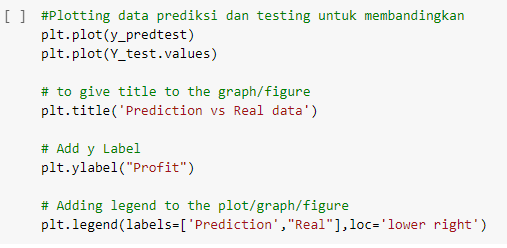

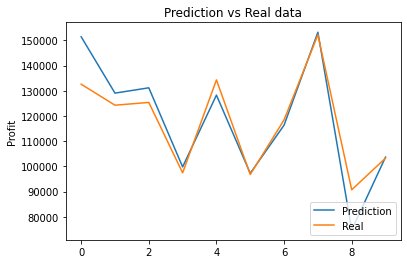

In [ ]:
plt.plot(y_predtest)
plt.plot(y_test.values)

plt.title('Prediction vs Real data')

plt.ylabel("Profit")

plt.legend(labels=['Prediction',"Real"],loc='lower right')

Terlihat bahwa nilai prediksi dan data testing juga cukup dekat

## Koefisien Determinasi (R2)

In [ ]:
print(f'R^2 score: {lin_reg.score(x, y)}')

R^2 score: 0.9499067945573266


Terlihat nilai R2 = 0.9499, ini merupakan nilai yang sangat bagus, ini menunjukkan 94.99% dari profit dapat diprediksi oleh R&D spend dan Marketing Spend. Sisanya (5.01%) dipengaruhi faktor lain yang tidak ada di model ini

## Uji Simultan, Parsial, dan besar pengaruh feature

In [ ]:
linreg.summary()                   #Ingat lagi x1 = R&D, x2 =  Marketing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     408.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           5.97e-26
Time:                        06:17:57   Log-Likelihood:                -421.18
No. Observations:                  40   AIC:                             848.4
Df Residuals:                      37   BIC:                             853.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.639e+04   2887.411     16.068      0.000    4.05e+04    5.22e+04
x1             0.8251      0.045     18.249      0.000       0.733       0.917
x2             0.0236      0.017      1.378      0.176      -0.011       0.058
==============================================================================
Omnibus:                       13.108   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.774
Skew:                          -0.964   Prob(JB):                     0.000228
Kurtosis:                       5.520   Cond. No.                     4.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.   Uji Simultan
> Terlihat nilai p-value uji-F (Prob (F-statistic)) adalah	5.97 x 10^-26 < 0.05, artinya secara bersama-sama R&D spend dan Marketing spend berpengaruh signifikan terhadap profit




2.   Uji Parsial
> Terlihat nilai p-value uji-T (P>|t|) untuk R&D adalah 0.000 < 0.05 dan untuk Marketing 0.176, artinya secara sendiri-sendiri R&D memberi pengaruh yang signifikan terhadap profit, sementara pengaruh dari Marketing tidak signifikan




3. Besar pengaruh feature
> Perhatikan kolom "coef", pada x1 (R&D) nilainya 0.8251, artinya setiap kenaikan perusahaan menaikkan kinerja R&D 1 level saja mampu meningkatkan profit perusahaan sebesar 0.8251. Sementara koefisien x2 (marketing) sebesar 0.0236. Artinya selama ini pengaruh marketing terhadap profit hanya 0.0236.


# Siang

# Model Regresi lainnya

Disini kita akan mencoba regresi Lasso, Ridge, Support Vector Regression, dan Decision Tree Regression

## Training Model

## Tugas 6   : Training 4 model

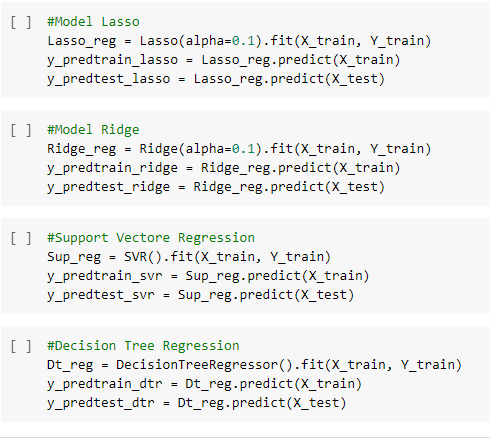

In [ ]:
Lasso_reg = Lasso(alpha=0.1).fit(x_train,y_train)
y_predtrain_lasso = Lasso_reg.predict(x_train)
y_predtest_lasso = Lasso_reg.predict(x_test)

Ridge_reg = Ridge(alpha=0.1).fit(x_train,y_train)
y_predtrain_ridge = Ridge_reg.predict(x_train)
y_predtest_ridge = Ridge_reg.predict(x_test)

Support_reg = SVR().fit(x_train,y_train)
y_predtrain_svr = Support_reg.predict(x_train)
y_predtest_svr = Support_reg.predict(x_test)

Dt_reg = DecisionTreeRegressor().fit(x_train,y_train)
y_predtrain_dtr = Dt_reg.predict(x_train)
y_predtest_dtr = Dt_reg.predict(x_test)








## Evaluasi Model

In [ ]:
#MSE
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, y_predtest_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, y_predtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, y_predtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, y_predtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, y_predtest_dtr))

Nilai MSE data training Regresi Linier =  81897487.02005282
Nilai MSE data testing Regresi Linier =  71176114.65887138 

Nilai MSE data training Regresi Lasso =  81897487.02005287
Nilai MSE data testing Regresi Lasso =  71176114.68561623 



ValueError: ignored

## Tugas 7 
Cari Nilai R2 dengan cara ini :     
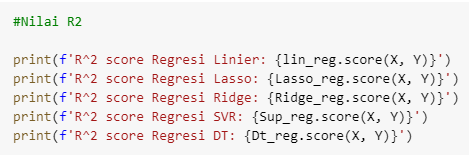

In [ ]:
#Nilai R2
print(f'R^2 score Regresi Linier:{lin_reg.score(x,y)}')
print(f'R^2 score Regresi Lasso:{Lasso_reg.score(x,y)}')
print(f'R^2 score Regresi Ridge:{Ridge_reg.score(x,y)}')
print(f'R^2 score Regresi SVR:{Support_reg.score(x,y)}')
print(f'R^2 score Regresi DT:{Dt_reg.score(x,y)}')


R^2 score Regresi Linier:0.9499067945573266
R^2 score Regresi Lasso:0.949906794553967
R^2 score Regresi Ridge:0.949906794557393
R^2 score Regresi SVR:-0.01832324402104457
R^2 score Regresi DT:0.9927170755580353



*   Model regresi Support Vector Regression memiliki MSE yang terlalu tinggi dibandingkan model regresi lainnya dan R2 yang sangat rendah, sehingga kemungkinan pada model ini terjadi underfitting
*   Model regresi Decision Tree Regression R2 paling bagus, mMSE data training 0 (sangat kecil), sementara MSE data testing jauh diatasnya, ini menunjukkan pada model ini terjadi overfitting
*   Model regresi linier, regresi Lasso, dan regresi Ridge memiliki MSE yang tidak jauh antara testing dan trainingnya. Nilai R2nya pun sangat bagus, hampir 95%. Ini menunjukkan model ini sudah good fit

# Tugas 8 (diskusi kelompok)

Buat model regresi dari data berikut : https://www.sheffield.ac.uk/polopoly_fs/1.937192!/file/Crime_R.csv

Pilih labelnya CrimeRate, lalu untuk feature pilih minimal 3 (boleh semuanya) yang berhubungan erat dengan CrimeRate, lakukan :      
1. Analisis Korelasi
2. Bikin beberapa model regresi
3. Hitung MSE training dan testing tiap model dan R2nya, menurutmu, mana model terbaik?
4. Lakukan visualisasi data untuk melihat perbandingan hasil data testing dan prediksi model yang kamu pilih


In [ ]:
! wget -O Crime_R.csv https://www.sheffield.ac.uk/polopoly_fs/1.937192!/file/Crime_R.csv


--2022-03-14 07:55:46--  https://www.sheffield.ac.uk/polopoly_fs/1.937192!/file/Crime_R.csv
Resolving www.sheffield.ac.uk (www.sheffield.ac.uk)... 143.167.2.102
Connecting to www.sheffield.ac.uk (www.sheffield.ac.uk)|143.167.2.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4881 (4.8K) [text/csv]
Saving to: ‘Crime_R.csv’

Crime_R.csv         100%[===================>]   4.77K  --.-KB/s    in 0s      

2022-03-14 07:55:47 (548 MB/s) - ‘Crime_R.csv’ saved [4881/4881]



## 1. Korelasi

In [ ]:
reglin = pd.read_csv('Crime_R.csv')
reglin.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [ ]:
reglin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            47 non-null     float64
 1   Youth                47 non-null     int64  
 2   Southern             47 non-null     int64  
 3   Education            47 non-null     float64
 4   ExpenditureYear0     47 non-null     int64  
 5   LabourForce          47 non-null     int64  
 6   Males                47 non-null     int64  
 7   MoreMales            47 non-null     int64  
 8   StateSize            47 non-null     int64  
 9   YouthUnemployment    47 non-null     int64  
 10  MatureUnemployment   47 non-null     int64  
 11  HighYouthUnemploy    47 non-null     int64  
 12  Wage                 47 non-null     int64  
 13  BelowWage            47 non-null     int64  
 14  CrimeRate10          47 non-null     float64
 15  Youth10              47 non-null     int64

In [ ]:
reglin.corr()


,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
CrimeRate,1.000000,-0.055002,-0.053465,0.157005,0.646211,0.169309,0.157113,0.141546,0.307945,-0.050613,...,0.629700,0.138849,0.163331,0.125157,0.303974,-0.038185,0.165357,-0.281453,0.436740,-0.076246
Youth,-0.055002,1.000000,0.584355,-0.404477,-0.505737,-0.160949,-0.028680,-0.048581,-0.280638,-0.224381,...,-0.513173,-0.073214,0.059896,0.005249,-0.282565,-0.201452,-0.244174,-0.097341,-0.615583,0.633203
Southern,-0.053465,0.584355,1.000000,-0.496831,-0.372636,-0.505469,-0.314733,-0.349630,-0.049918,-0.172419,...,-0.376168,-0.478050,-0.329930,-0.263777,-0.054286,-0.186064,0.071269,-0.317315,-0.615912,0.751462
Education,0.157005,-0.404477,-0.496831,1.000000,0.300018,0.427860,0.272360,0.057403,-0.001403,-0.026598,...,0.318456,0.427725,0.173557,-0.056985,-0.000550,0.009220,-0.171931,0.233205,0.485811,-0.623747
ExpenditureYear0,0.646211,-0.505737,-0.372636,0.300018,1.000000,0.121493,0.033760,0.036784,0.526284,-0.043698,...,0.993586,0.047956,-0.003897,-0.012378,0.531186,-0.038003,0.135443,-0.157784,0.787296,-0.538800
LabourForce,0.169309,-0.160949,-0.505469,0.427860,0.121493,1.000000,0.513559,0.366911,-0.123672,-0.229400,...,0.106350,0.974818,0.474179,0.286188,-0.125571,-0.200756,-0.347803,0.198845,0.272300,-0.254833
Males,0.157113,-0.028680,-0.314733,0.272360,0.033760,0.513559,1.000000,0.836195,-0.410628,0.351892,...,0.022843,0.535478,0.882966,0.745046,-0.408964,0.373205,0.035302,0.247763,0.177925,-0.161323
MoreMales,0.141546,-0.048581,-0.349630,0.057403,0.036784,0.366911,0.836195,1.000000,-0.351102,0.429861,...,0.040843,0.385071,0.796917,0.936117,-0.346462,0.431853,0.082788,0.260228,0.106842,-0.105233
StateSize,0.307945,-0.280638,-0.049918,-0.001403,0.526284,-0.123672,-0.410628,-0.351102,1.000000,-0.038120,...,0.513789,-0.175913,-0.378248,-0.342549,0.999371,-0.020832,0.201788,-0.143571,0.308716,-0.060654
YouthUnemployment,-0.050613,-0.224381,-0.172419,-0.026598,-0.043698,-0.229400,0.351892,0.429861,-0.038120,1.000000,...,-0.051712,-0.237177,0.321949,0.449803,-0.040807,0.991235,0.726123,0.061028,0.012540,-0.087397


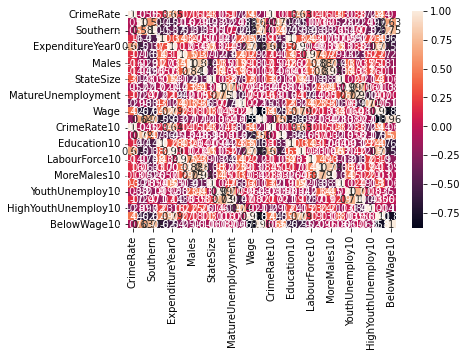

In [ ]:
#Atau Jika menggunakan heatmap
sns.heatmap(reglin.corr(), annot=True)

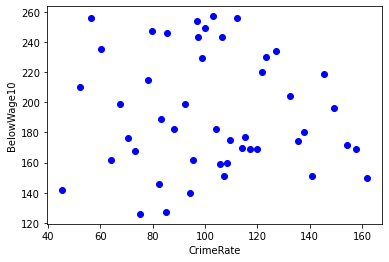

In [ ]:
plt.scatter(reglin['CrimeRate'], reglin['BelowWage10'], color='blue')
plt.xlabel("CrimeRate")
plt.ylabel("BelowWage10")
plt.show()

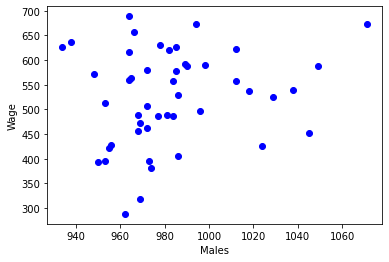

In [ ]:
plt.scatter(reglin['Males'], reglin['Wage'], color='blue')
plt.xlabel("Males")
plt.ylabel("Wage")
plt.show()

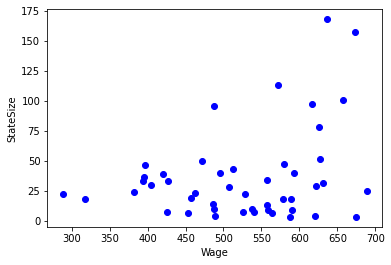

In [ ]:
plt.scatter(reglin['Wage'], reglin['StateSize'], color='blue')
plt.xlabel("Wage")
plt.ylabel("StateSize")
plt.show()

In [ ]:
features = ['CrimeRate','Males','Wage']
x=reglin[features].values
y=reglin.StateSize
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


hasil uji Kolmogorov Smirnov 
  KstestResult(statistic=0.19885922661737665, pvalue=0.09298675986499386)


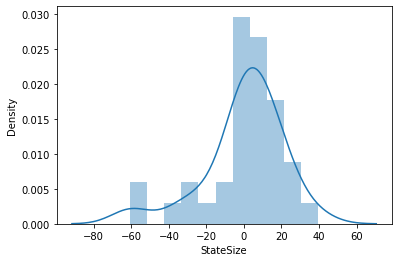

In [ ]:
y_predtrain = lin_reg.predict(x_train)         #Prediksi model data train
err = y_predtrain - y_train                   #Residualnya data train
sns.distplot(err)                              #membuat plot histogramnya

z_er = stats.zscore(err)
norm_er = stats. kstest(z_er, 'norm', )        #uji kolmogorov-smirnov
print('hasil uji Kolmogorov Smirnov \n ' , norm_er)

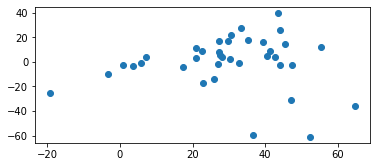

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predtrain, err)

In [ ]:
vif = [variance_inflation_factor(x_train, i) for i in range(len(x_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,CrimeRate,Males,Wage
VIF,16.350275,38.229535,45.375629


In [ ]:
x_constant = sm.add_constant(x_train)                #Ingat lagi x1 = R&D, x2 =  Marketing
linreg = sm.OLS(y_train,x_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              StateSize   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     7.480
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           0.000594
Time:                        09:50:23   Log-Likelihood:                -165.02
No. Observations:                  37   AIC:                             338.0
Df Residuals:                      33   BIC:                             344.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.1323    124.120      4.328      0.000     284.608     789.656
x1             0.2306      0.139      1.660      0.106      -0.052       0.513
x2            -0.5756      0.132     -4.370      0.000      -0.844      -0.308
x3             0.0732      0.047      1.547      0.131      -0.023       0.169
==============================================================================
Omnibus:                       12.644   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.866
Skew:                           1.168   Prob(JB):                      0.00161
Kurtosis:                       4.699   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Type Your Code Here
y_predtest = lin_reg.predict(x_test)

#MSE
MSE_train = mean_squared_error(y_train,y_predtrain)
print('Nilai MSE data training =', MSE_train)
MSE_test = mean_squared_error(y_test, y_predtest)
print('Nilai MSE data testing =', MSE_test)

#RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training =', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing =', RMSE_test)

#MAE
MAE_train = mean_absolute_error(y_train,y_predtrain)
print('Nilai MAE data training =', MAE_train)
MAE_test = mean_absolute_error(y_test, y_predtest)
print('Nilai MAE data testing =', MAE_test)

Nilai MSE data training = 437.87863777941675
Nilai MSE data testing = 2753.5693792641696
Nilai RMSE data training = 20.92554987997727
Nilai RMSE data testing = 52.47446406838444
Nilai MAE data training = 14.786719567873599
Nilai MAE data testing = 40.91236363194826


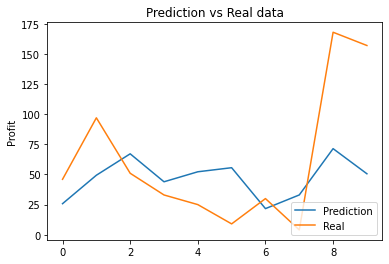

In [ ]:
plt.plot(y_predtest)
plt.plot(y_test.values)

plt.title('Prediction vs Real data')

plt.ylabel("Profit")

plt.legend(labels=['Prediction',"Real"],loc='lower right')

In [ ]:
print(f'R^2 score: {lin_reg.score(x, y)}')

R^2 score: 0.34400531543786017


In [ ]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              StateSize   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     7.480
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           0.000594
Time:                        09:58:47   Log-Likelihood:                -165.02
No. Observations:                  37   AIC:                             338.0
Df Residuals:                      33   BIC:                             344.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.1323    124.120      4.328      0.000     284.608     789.656
x1             0.2306      0.139      1.660      0.106      -0.052       0.513
x2            -0.5756      0.132     -4.370      0.000      -0.844      -0.308
x3             0.0732      0.047      1.547      0.131      -0.023       0.169
==============================================================================
Omnibus:                       12.644   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.866
Skew:                           1.168   Prob(JB):                      0.00161
Kurtosis:                       4.699   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. Model Regresi

In [ ]:
Lasso_reg = Lasso(alpha=0.1).fit(x_train,y_train)
y_predtrain_lasso = Lasso_reg.predict(x_train)
y_predtest_lasso = Lasso_reg.predict(x_test)

Ridge_reg = Ridge(alpha=0.1).fit(x_train,y_train)
y_predtrain_ridge = Ridge_reg.predict(x_train)
y_predtest_ridge = Ridge_reg.predict(x_test)

Support_reg = SVR().fit(x_train,y_train)
y_predtrain_svr = Support_reg.predict(x_train)
y_predtest_svr = Support_reg.predict(x_test)

Dt_reg = DecisionTreeRegressor().fit(x_train,y_train)
y_predtrain_dtr = Dt_reg.predict(x_train)
y_predtest_dtr = Dt_reg.predict(x_test)


In [ ]:
#MSE
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, y_predtrain))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, y_predtest), '\n')

print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, y_predtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, y_predtest_lasso), '\n')

print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, y_predtest_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, y_predtest_ridge), '\n')

print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, y_predtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, y_predtest_svr), '\n')

print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, y_predtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, y_predtest_dtr))

Nilai MSE data training Regresi Linier =  437.87863777941675
Nilai MSE data testing Regresi Linier =  2753.5693792641696 

Nilai MSE data training Regresi Lasso =  437.8786664845767
Nilai MSE data testing Regresi Lasso =  2753.8441714399064 



ValueError: ignored

## 3. Hitung MSE & R2

In [ ]:
#Nilai R2
print(f'R^2 score Regresi Linier:{lin_reg.score(x,y)}')
print(f'R^2 score Regresi Lasso:{Lasso_reg.score(x,y)}')
print(f'R^2 score Regresi Ridge:{Ridge_reg.score(x,y)}')
print(f'R^2 score Regresi SVR:{Support_reg.score(x,y)}')
print(f'R^2 score Regresi DT:{Dt_reg.score(x,y)}')


R^2 score Regresi Linier:0.34400531543786017
R^2 score Regresi Lasso:0.34396408466285333
R^2 score Regresi Ridge:0.34400491752256235
R^2 score Regresi SVR:-0.14600606836074137
R^2 score Regresi DT:0.7359055104038886


In [ ]:
#R2
#Type Your Code Here

## 4. Visualisasi Data Prediksi

In [ ]:
#Plotting data prediksi dan testing untuk membandingkan
#Type You Code Here